<a href="https://colab.research.google.com/github/BlazeIngithub/BlazeIngithub/blob/main/ann_fashion_mnist_pytorch_optuna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [386]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt



In [387]:
#set random seed for reproduceability
torch.manual_seed(42)

In [388]:
#check for gpu

device= torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')


Using device: cuda


In [389]:
df= pd.read_csv("/content/fashion-mnist_train.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [390]:
df.shape

(60000, 785)

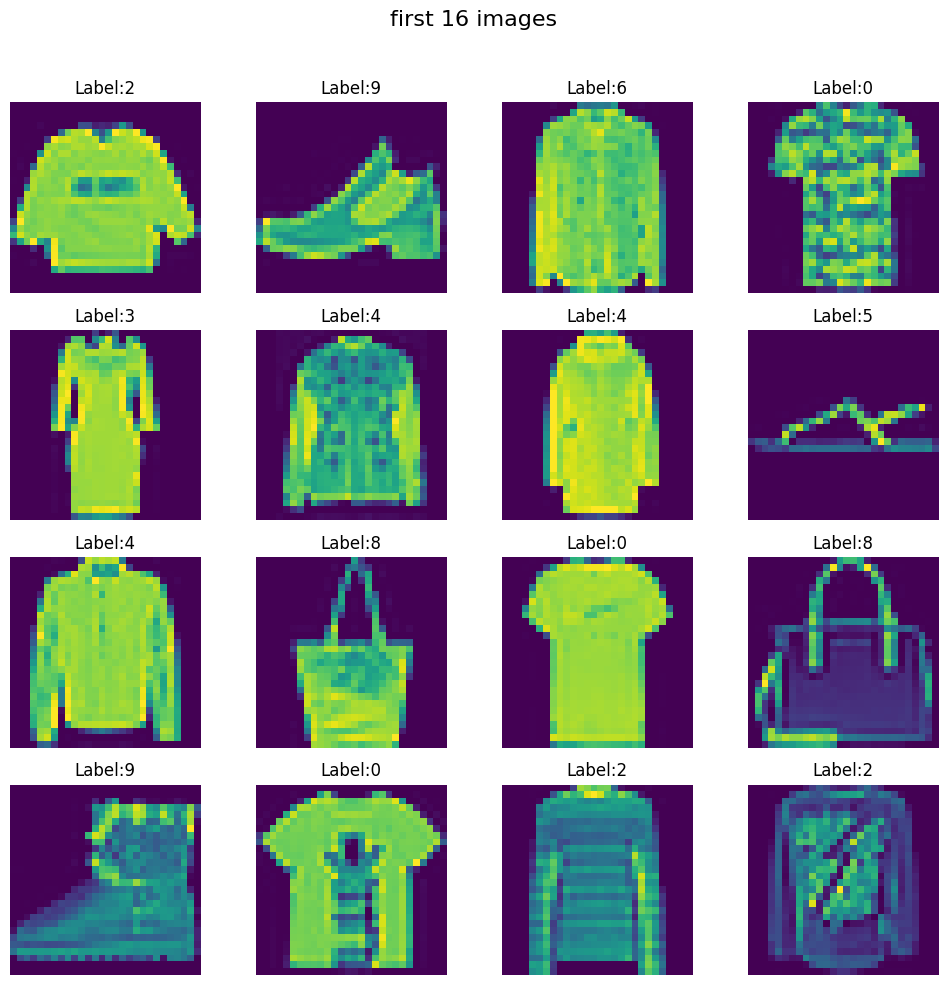

In [391]:
#create a 4X4 grid of images

fig, axes =  plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("first 16 images", fontsize=16)


#Plot the first 16 image from the the dataset

for i, ax in enumerate(axes.flat):
  im= df.iloc[i, 1:].values.reshape(28, 28) #Reshape to 28X28
  ax.imshow(im) #display in grey scale
  ax.axis("off")
  ax.set_title(f"Label:{df.iloc[i,0]}") #show the label

plt.tight_layout(rect=[0, 0, 1, 0.96]) #adjut layout to fit the title

plt.show()


In [392]:
# train test split

X= df.iloc[:, 1:].values
y= df.iloc[:, 0].values





In [393]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2,random_state=42)

In [394]:
#scalin the feature

X_train= X_train/255.0
X_test= X_test/255.0

In [395]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.        ,
        0.        ]])

In [396]:
#Create custom dataset class

class CustomDataset(Dataset):
  def __init__(self, features, labels):
    self.features=torch.tensor(features, dtype= torch.float32)
    self.labels= torch.tensor(labels, dtype= torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index], self.labels[index]





In [397]:
#Create dataset object
# create train dataset object

train_dataset= CustomDataset(X_train, y_train)


In [398]:
len(train_dataset)

48000

In [399]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2275,
         0.5333, 0.0000, 0.0

In [400]:
9#create test_data set

test_dataset= CustomDataset(X_test, y_test)

In [401]:
len(test_dataset)

12000

In [402]:
class MyNN(nn.Module):

  def __init__(self, input_dim, output_dim, num_hidden_layers,neuron_per_layer, dropout_rate):
    super().__init__()

    layers= []

    for i in range(num_hidden_layers):
      layers.append(nn.Linear(input_dim, neuron_per_layer))
      layers.append(nn.BatchNorm1d(neuron_per_layer))
      layers.append(nn.ReLU())
      layers.append(nn.Dropout(dropout_rate))

      input_dim= neuron_per_layer

    layers.append(nn.Linear(neuron_per_layer, output_dim))

    self.model= nn.Sequential(*layers)

  def forward(self, x):
    return self.model(x)







In [403]:
#objective function

def objective(trial):

  #next hyperparameter values from the search space
  num_hidden_layers= trial.suggest_int("num_hidden_layers", 1, 5)
  neuron_per_layer= trial.suggest_int("neauron_per_layer", 8, 128, step= 8)
  epochs= trial.suggest_int("epochs", 10, 50, step= 10)
  learning_rate= trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
  dropout_rate= trial.suggest_float("droput_rate", 0.1, 0.5, step=0.1)
  batch_size= trial.suggest_categorical('batch_size', [16, 32, 64, 128])
  optimizer_name= trial.suggest_categorical("optimizer_name", ['Adam', 'SGD', 'RMSprop'])
  weight_decay= trial.suggest_float("weight_decay", 1e-5, 1e-3, log=True)

  #create train and test loader

  train_loader= DataLoader(train_dataset, batch_size=batch_size, shuffle= True, pin_memory=True)
  test_loader= DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)

  #model init

  input_dim=784
  output_dim=10

  model= MyNN(input_dim, output_dim, num_hidden_layers,neuron_per_layer, dropout_rate)
  model.to(device)



  #param init
  learning_rate= 0.1

  #optimizer selection
  criterion= nn.CrossEntropyLoss()

  if optimizer_name== 'Adam':
    optimizer= optim.Adam(model.parameters(), lr= learning_rate, weight_decay=weight_decay)
  elif optimizer_name== 'SGD':
    optimizer= optim.SGD(model.parameters(), lr= learning_rate, weight_decay=weight_decay)
  else:
    optimizer= optim.RMSprop(model.parameters(), lr= learning_rate, weight_decay=weight_decay)

  #trainng Loop
  for epoch in range(epochs):


    for batch_features, batch_labels in train_loader:

      #move data to gpu
      batch_features, batch_labels= batch_features.to(device), batch_labels.to(device)

      #forward pass
      outputs= model(batch_features)

      #calculate loss
      loss= criterion(outputs, batch_labels)

      #back pass
      optimizer.zero_grad()
      loss.backward()

      #update grads
      optimizer.step()

  #Evaluation
  model.eval()

  #Evaluation code on test data

  total= 0
  correct= 0

  with torch.no_grad():

    for batch_features, batch_labels in test_loader:

      #Move to gpu
      batch_features, batch_labels= batch_features.to(device), batch_labels.to(device)

      outputs= model(batch_features)
      _, predicted = torch.max(outputs, 1)

      total= total + batch_labels.shape[0]

      correct= correct + (predicted== batch_labels).sum().item()

  accuracy= correct/total

  return accuracy





In [404]:
!pip install optuna


In [405]:
import optuna

study= optuna.create_study(direction= "maximize")


[I 2025-10-06 07:40:18,937] A new study created in memory with name: no-name-ffe52344-4e92-478d-b4cd-d5aa9a427115


In [406]:
study.optimize(objective, n_trials=10)

[I 2025-10-06 07:42:55,972] Trial 0 finished with value: 0.40891666666666665 and parameters: {'num_hidden_layers': 4, 'neauron_per_layer': 72, 'epochs': 30, 'learning_rate': 0.00016552775003547134, 'droput_rate': 0.30000000000000004, 'batch_size': 32, 'optimizer_name': 'RMSprop', 'weight_decay': 1.1256658327017253e-05}. Best is trial 0 with value: 0.40891666666666665.
[I 2025-10-06 07:44:28,362] Trial 1 finished with value: 0.8321666666666667 and parameters: {'num_hidden_layers': 1, 'neauron_per_layer': 8, 'epochs': 20, 'learning_rate': 0.040429703822391645, 'droput_rate': 0.2, 'batch_size': 16, 'optimizer_name': 'SGD', 'weight_decay': 3.154295963458113e-05}. Best is trial 1 with value: 0.8321666666666667.
[I 2025-10-06 07:45:56,344] Trial 2 finished with value: 0.8701666666666666 and parameters: {'num_hidden_layers': 4, 'neauron_per_layer': 112, 'epochs': 20, 'learning_rate': 0.0006056975128050719, 'droput_rate': 0.1, 'batch_size': 32, 'optimizer_name': 'SGD', 'weight_decay': 0.000658

In [407]:
study.best_params

{'num_hidden_layers': 4,
 'neauron_per_layer': 112,
 'epochs': 20,
 'learning_rate': 0.0006056975128050719,
 'droput_rate': 0.1,
 'batch_size': 32,
 'optimizer_name': 'SGD',
 'weight_decay': 0.0006586663465150094}